Biblioteki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Zadanie

1.1. Należy wczytać dane

In [2]:
iris_pd = pd.read_csv('iris.csv')

1.2.   Sprawdzić podstawowe statystyki.  

In [3]:
print(iris_pd.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


1.3. Sprawdzić kompletność danych. 

In [4]:
print(iris_pd.head()) 

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
print(iris_pd.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
print(iris_pd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


1.4. Przeprowadzić normalizację danych w zakresie [0,1] na kolumnach (z wyłączeniem 
kolumny species). 

In [7]:
iris_normalized_1 = iris_pd.copy()
num_cols = iris_normalized_1.columns.difference(['species'])
iris_normalized_1[num_cols] = (iris_normalized_1[num_cols] - iris_normalized_1[num_cols].min()) / (iris_normalized_1[num_cols].max() - iris_normalized_1[num_cols].min())

print(iris_normalized_1.head())

   sepal_length  sepal_width  petal_length  petal_width species
0      0.222222     0.625000      0.067797     0.041667  setosa
1      0.166667     0.416667      0.067797     0.041667  setosa
2      0.111111     0.500000      0.050847     0.041667  setosa
3      0.083333     0.458333      0.084746     0.041667  setosa
4      0.194444     0.666667      0.067797     0.041667  setosa


1.5. Przeprowadzić normalizację danych w zakresie [-1,1] na kolumnach (z wyłączeniem 
kolumny species) 

In [8]:
iris_normalized_2 = iris_pd.copy()
iris_normalized_2[num_cols] = 2 * (iris_normalized_2[num_cols] - iris_normalized_2[num_cols].min()) / (iris_normalized_2[num_cols].max() - iris_normalized_2[num_cols].min()) - 1

print(iris_normalized_2.head())

   sepal_length  sepal_width  petal_length  petal_width species
0     -0.555556     0.250000     -0.864407    -0.916667  setosa
1     -0.666667    -0.166667     -0.864407    -0.916667  setosa
2     -0.777778     0.000000     -0.898305    -0.916667  setosa
3     -0.833333    -0.083333     -0.830508    -0.916667  setosa
4     -0.611111     0.333333     -0.864407    -0.916667  setosa


1.6. Przeprowadzić  standaryzację  danych  na  kolumnach  (z  wyłączeniem  kolumny 
species).   

In [9]:
iris_standardized = iris_pd.copy()
iris_standardized[num_cols] = (iris_standardized[num_cols] - iris_standardized[num_cols].mean()) / iris_standardized[num_cols].std()

print(iris_standardized.head())

   sepal_length  sepal_width  petal_length  petal_width species
0     -0.897674     1.028611     -1.336794    -1.308593  setosa
1     -1.139200    -0.124540     -1.336794    -1.308593  setosa
2     -1.380727     0.336720     -1.393470    -1.308593  setosa
3     -1.501490     0.106090     -1.280118    -1.308593  setosa
4     -1.018437     1.259242     -1.336794    -1.308593  setosa


1.7. Narysować wykres zbiorczy, składający się z 4 wykresów, zależności długości płatka 
[cm]  od  szerokości  płatka  [cm]  różnicowany  na  podstawie  gatunku  dla  danych 
pierwotnych, znormalizowanych w zakresie [0,1], znormalizowanych w zakresie [-
1,1] oraz standaryzowanych.

In [10]:
def plot_scatter(data, title, ax):
    species = data['species'].unique()
    for sp in species:
        subset = data[data['species'] == sp]
        ax.scatter(subset['petal_width'], subset['petal_length'], label=sp)
    ax.set_xlabel('Szerokość płatka [cm]')
    ax.set_ylabel('Długość płatka [cm]')
    ax.set_title(title)
    ax.legend()

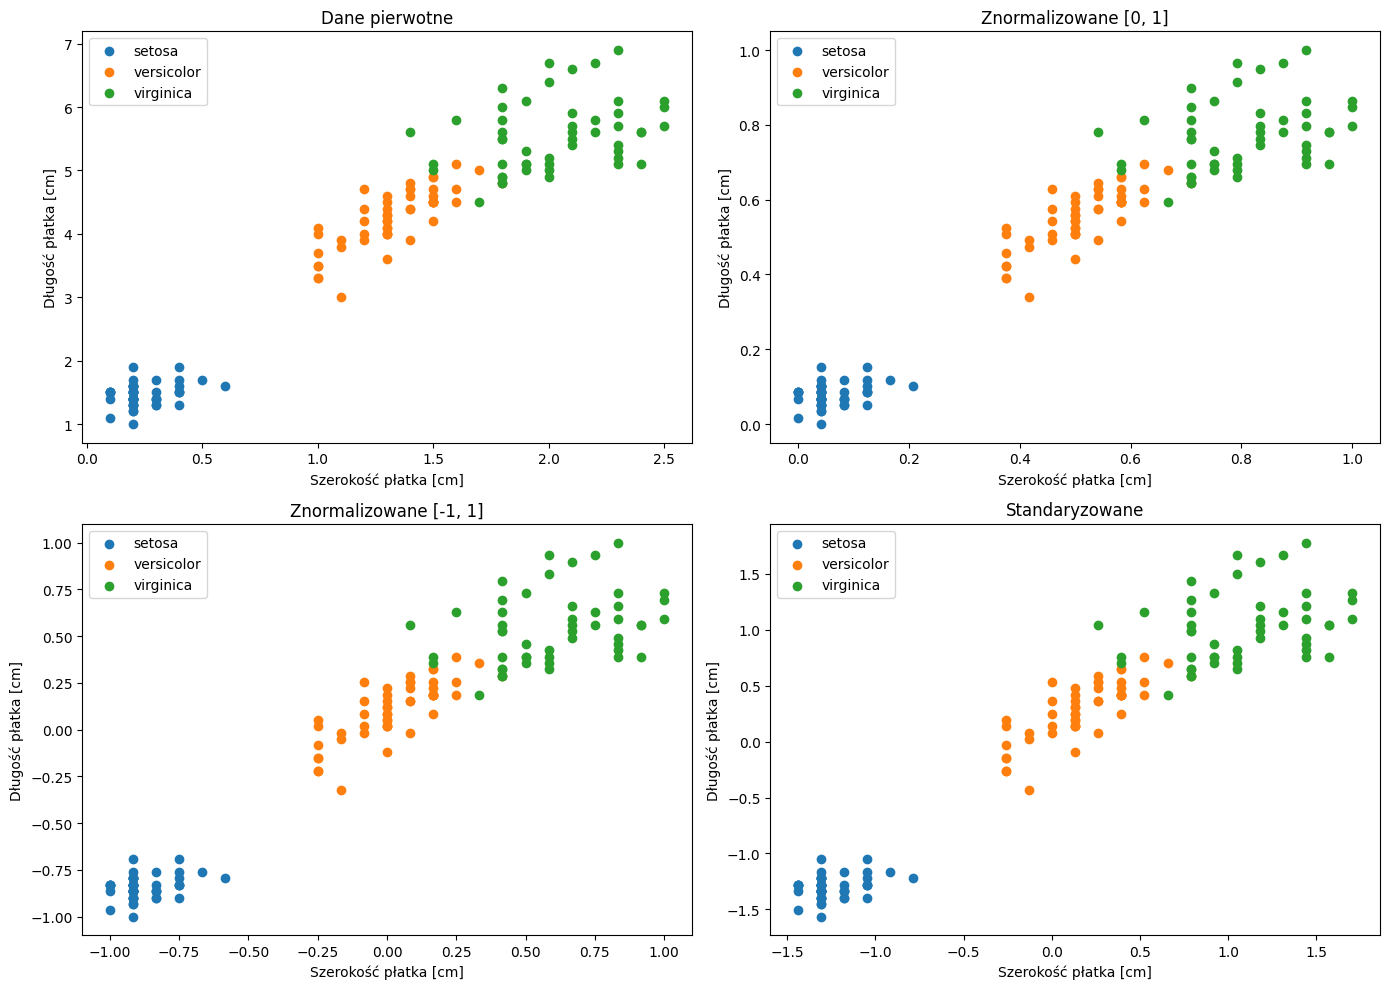

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

plot_scatter(iris_pd, "Dane pierwotne", axs[0, 0])
plot_scatter(iris_normalized_1, "Znormalizowane [0, 1]", axs[0, 1])
plot_scatter(iris_normalized_2, "Znormalizowane [-1, 1]", axs[1, 0])
plot_scatter(iris_standardized, "Standaryzowane", axs[1, 1])

plt.tight_layout()
plt.show()

1.8. Narysować  wykres  zbiorczy,  składający  się  z  4  wykresów,  zależności  długości 
kielicha [cm] od szerokości kielicha [cm] różnicowany na podstawie gatunku dla 
danych  pierwotnych,  znormalizowanych  w zakresie  [0,1],  znormalizowanych  w 
zakresie [-1,1] oraz standaryzowanych.

In [12]:
def plot_scatter(data, title, ax):
    species = data['species'].unique()
    for sp in species:
        subset = data[data['species'] == sp]
        ax.scatter(subset['sepal_width'], subset['sepal_length'], label=sp)
    ax.set_xlabel('Szerokość kielicha [cm]')
    ax.set_ylabel('Długość kielicha [cm]')
    ax.set_title(title)
    ax.legend()

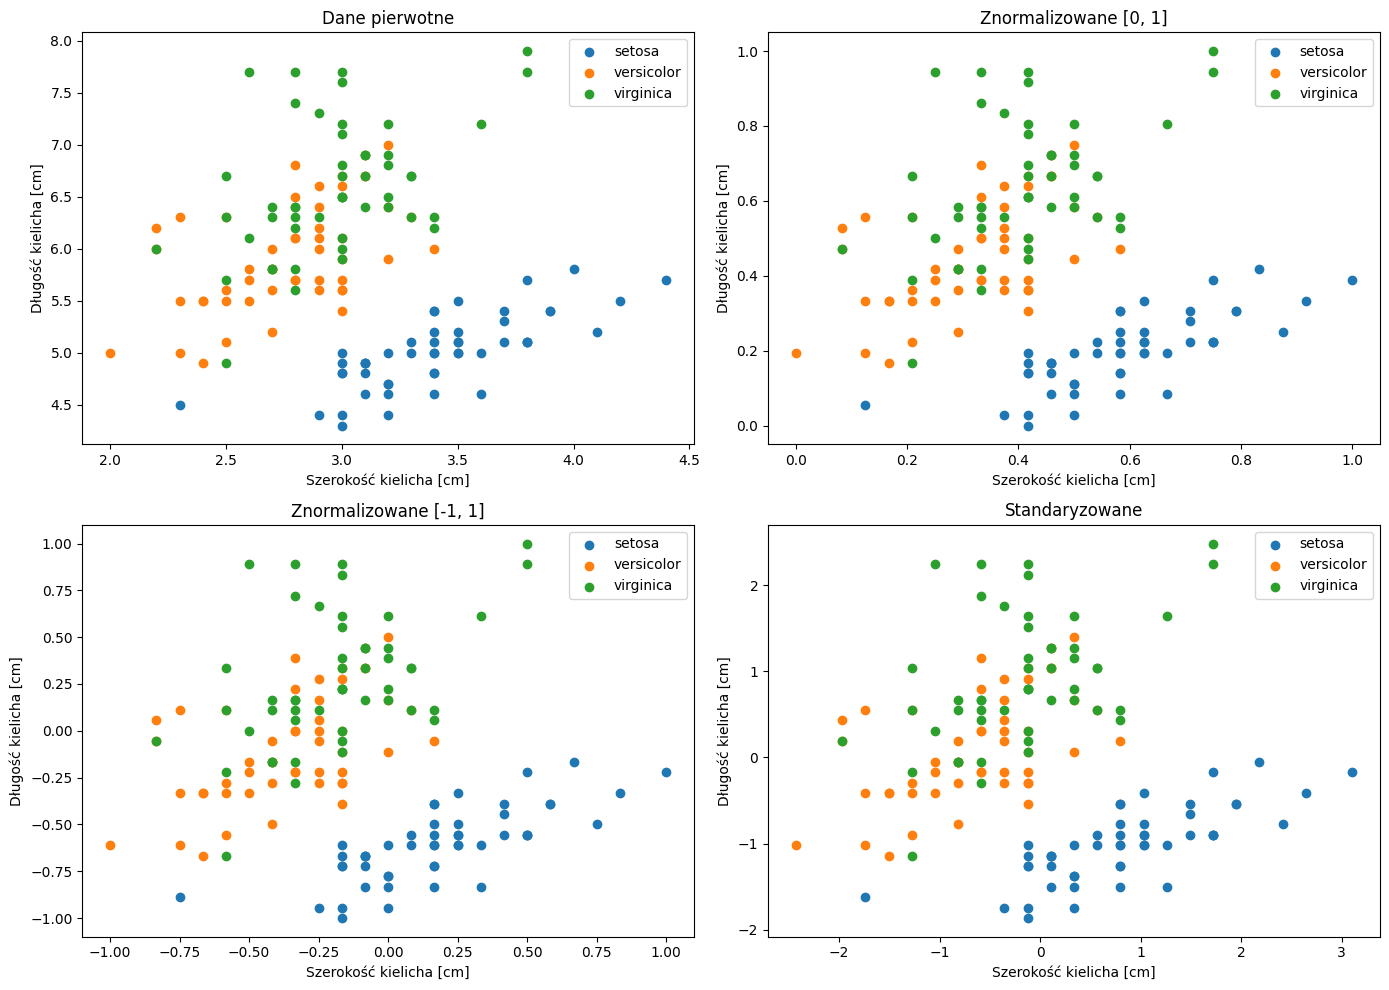

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

plot_scatter(iris_pd, "Dane pierwotne", axs[0, 0])
plot_scatter(iris_normalized_1, "Znormalizowane [0, 1]", axs[0, 1])
plot_scatter(iris_normalized_2, "Znormalizowane [-1, 1]", axs[1, 0])
plot_scatter(iris_standardized, "Standaryzowane", axs[1, 1])

plt.tight_layout()
plt.show()

### 2 Zadanie

2.1. Przeprowadzić  normalizację  danych:  każde  widmo  należy  znormalizować  do 
amplitudy pasma przy 985 cm-1 (z wyłączeniem kolumny Wavenumber [cm^-1]). 

In [31]:
raman_pd = pd.read_csv('Zad2_L1.csv', sep=';', decimal=',')

In [32]:
raman_pd = raman_pd.replace(',', '.', regex=True) # Wartości są zapisane z przecinkami zmienia na kropki
raman_pd = raman_pd.drop(index=0).reset_index(drop=True) # Pominięcie indexu z t0 t1 itd

intensity_cols = raman_pd.columns.difference(['Wavenumber [cm^-1]'])
raman_pd[intensity_cols] = raman_pd[intensity_cols].apply(pd.to_numeric, errors='coerce') # Zamiana na numeryczne dane

target_index = raman_pd[raman_pd['Wavenumber [cm^-1]'].astype(str).str.startswith('985')].index[0]

print(raman_pd[intensity_cols])
raman_pd_copy = raman_pd
intensity_cols_copy = intensity_cols

amplitude_at_target = raman_pd_copy.loc[target_index, intensity_cols_copy]  
normalized_intensity =raman_pd_copy[intensity_cols_copy].div(amplitude_at_target)

print(normalized_intensity)

      Intensity [a.u.]  Intensity [a.u.].1  Intensity [a.u.].2  \
0             0.006048            0.007059            0.009829   
1             0.005961            0.007120            0.009688   
2             0.005874            0.007230            0.009547   
3             0.005577            0.007010            0.009466   
4             0.005410            0.006690            0.009575   
...                ...                 ...                 ...   
1757          0.002559           -0.000332            0.002336   
1758          0.002142           -0.000420            0.002818   
1759          0.001934           -0.000218            0.002681   
1760          0.001877            0.000294            0.002083   
1761          0.001740            0.000605            0.001626   

      Intensity [a.u.].3  Intensity [a.u.].4  Intensity [a.u.].5  
0               0.010507            0.009625            0.012082  
1               0.010243            0.010031            0.011809  
2     

2.2. Narysować  wykres  zbiorczy  składający  się  z  2  wykresów:  widma    dla  danych 
surowych oraz widma znormalizowane.

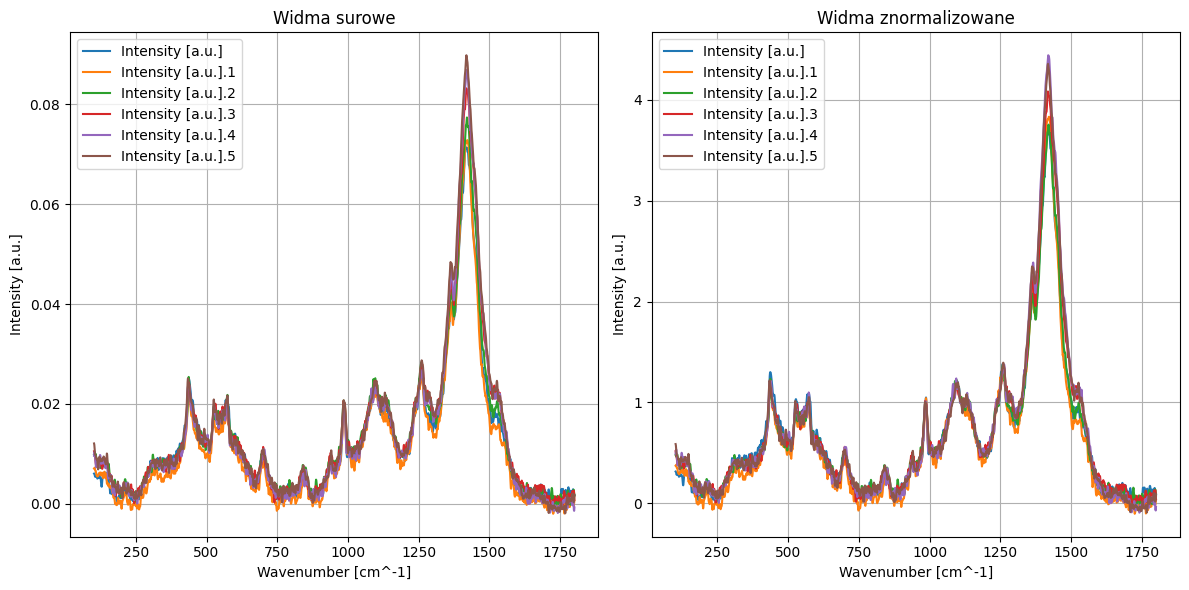

In [16]:
raw_wavenumber = raman_pd['Wavenumber [cm^-1]']

raw_intensity = raman_pd[intensity_cols]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
for col in intensity_cols:
    plt.plot(raw_wavenumber, raw_intensity[col], label=col)

plt.title('Widma surowe')
plt.xlabel('Wavenumber [cm^-1]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.grid()


plt.subplot(1, 2, 2)  
for col in intensity_cols:
    plt.plot(raw_wavenumber, normalized_intensity[col], label=col)

plt.title('Widma znormalizowane')
plt.xlabel('Wavenumber [cm^-1]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

2.3. Jaka jest przyczyna zastosowania powyższego sposobu normalizacji?

In [22]:
print("Ponieważ dane te dotyczą widm, można je znormalizować do konkretnej"
    "wartości co ułatwia interpretację i pozwala bezpośrednio porównać wyniki")

Ponieważ dane te dotyczą widm, można je znormalizować do konkretnejwartości co ułatwia interpretację i pozwala bezpośrednio porównać wyniki


### 3 Zadanie

3.1. Przeprowadzić normalizację danych: każde widm należy znormalizować do pola 
powierzchni pod wykresem (z wyłączeniem kolumny Wavenumber [cm^-1]).

In [36]:
raman_pd2 = pd.read_csv('Zad3_L1.csv', sep=';', decimal=',')

In [37]:
intensity_cols = raman_pd2.columns.difference(['Wavenumber [cm^-1]'])

# pole powierzchni metodą trapezową
areas = []
for col in intensity_cols:
    area = abs(raman_pd2[col]).sum()  
    areas.append(area)

# normalizacja na podstawie pola powierzchni
raman_normalized = raman_pd2.copy()  
for i, col in enumerate(intensity_cols):
    raman_normalized[col] = raman_pd2[col] / areas[i]

print(raman_pd2.head())

   Wavenumber [cm^-1]     3 min    30 min    60 min    90 min   120 min  \
0            525.0251 -0.009406 -0.004727 -0.008923  0.000000 -0.010655   
1            525.2661 -0.007316 -0.004123 -0.008593  0.000155 -0.010266   
2            525.5072 -0.005362 -0.003581 -0.008142  0.000257 -0.009673   
3            525.7482 -0.004040 -0.003063 -0.007549  0.000304 -0.008918   
4            525.9893 -0.003421 -0.002554 -0.006850  0.000467 -0.008159   

    150 min   180 min   300 min   360 min  1800 min  
0  0.000000 -0.001319  0.000000  0.000000  0.000000  
1  0.000538 -0.001846  0.000744  0.000147 -0.000066  
2  0.001312 -0.002225  0.001452  0.000452 -0.000073  
3  0.001741 -0.002328  0.002208  0.000884  0.000012  
4  0.001232 -0.002201  0.003054  0.001383  0.000210  


3.2. Narysować  wykres  zbiorczy  składający  się  z  2  wykresów:  widma    dla  danych 
surowych oraz widma znormalizowane. 

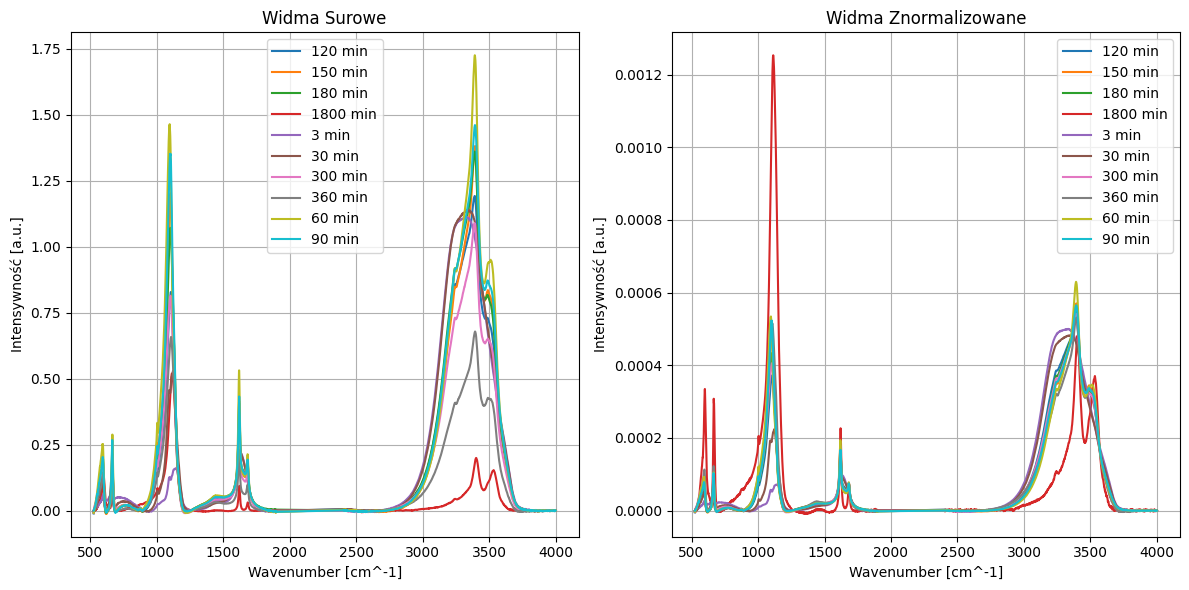

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for col in intensity_cols:
    plt.plot(raman_pd2['Wavenumber [cm^-1]'], raman_pd2[col], label=col)
plt.title('Widma Surowe')
plt.xlabel('Wavenumber [cm^-1]')
plt.ylabel('Intensywność [a.u.]')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
for col in intensity_cols:
    plt.plot(raman_normalized['Wavenumber [cm^-1]'], raman_normalized[col], label=col)
plt.title('Widma Znormalizowane')
plt.xlabel('Wavenumber [cm^-1]')
plt.ylabel('Intensywność [a.u.]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

3.3. Jaka jest przyczyna zastosowania powyższego sposobu normalizacji?

In [43]:
print("Zastosowanie normalizacji do pola powierzchni pod wykresem umożliwia\n"
      "porównanie różnych widm w sposób niezależny od ich amplitudy, co ułatwia analizę i interpretację danych")

Zastosowanie normalizacji do pola powierzchni pod wykresem umożliwia
porównanie różnych widm w sposób niezależny od ich amplitudy, co ułatwia analizę i interpretację danych
